In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime

In [2]:
df=pd.read_csv("C:/Users/soori/Desktop/face class/Data sci-Projects/project 4 time series/time_series_Microsoft_Stock.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438


In [4]:
df.tail()

,Date,Open,High,Low,Close,Volume
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012
1510,3/31/2021 16:00:00,232.91,239.10,232.39,235.77,43623471


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Open    1511 non-null   float64       
 2   High    1511 non-null   float64       
 3   Low     1511 non-null   float64       
 4   Close   1511 non-null   float64       
 5   Volume  1511 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 71.0 KB


In [8]:
df.set_index('Date',inplace=True)

In [9]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [10]:
df.shape

(1511, 5)

In [11]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['High'].values)
print("p-value:{}".format(result[1]))

p-value:0.997766061521655


# p>0.05 data is not stationary

<AxesSubplot:xlabel='Date'>

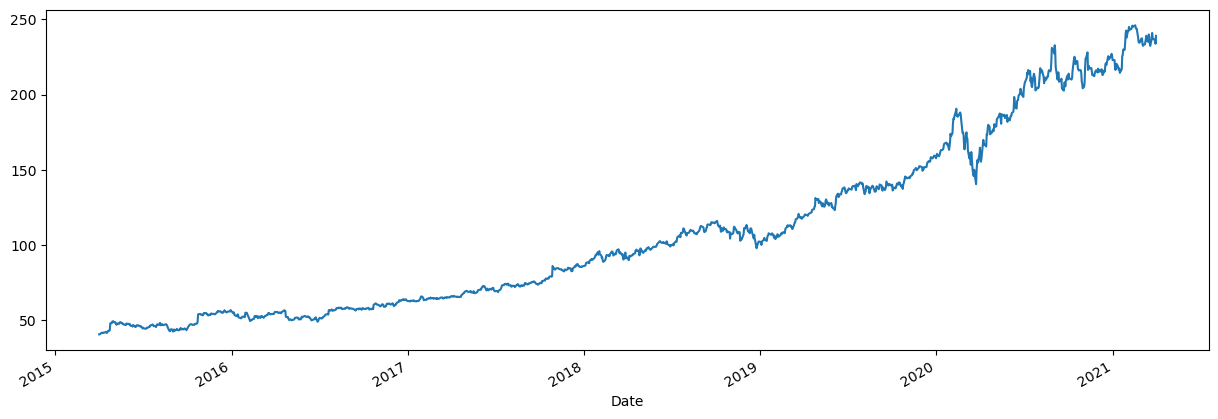

In [12]:
plt.figure(figsize=(15,5))
df['High'].plot()

In [13]:
def adf_test(series):
    result=adfuller(series)
    print('p-value:{}'.format(result[1]))
    if result[1]<=0.05:
        print('Reject null hypothesis.Data is stationary')
    else:
        print('Reject null hypothesis.Data is non-stationary')
adf_test(df['High'])

p-value:0.997766061521655
Reject null hypothesis.Data is non-stationary


#Differencing to make time series stationary

In [14]:
df['High'],df['High'].shift(1)

(Date
 2015-04-01 16:00:00     40.76
 2015-04-02 16:00:00     40.74
 2015-04-06 16:00:00     41.78
 2015-04-07 16:00:00     41.91
 2015-04-08 16:00:00     41.69
                         ...  
 2021-03-25 16:00:00    236.94
 2021-03-26 16:00:00    236.71
 2021-03-29 16:00:00    236.80
 2021-03-30 16:00:00    233.85
 2021-03-31 16:00:00    239.10
 Name: High, Length: 1511, dtype: float64,
 Date
 2015-04-01 16:00:00       NaN
 2015-04-02 16:00:00     40.76
 2015-04-06 16:00:00     40.74
 2015-04-07 16:00:00     41.78
 2015-04-08 16:00:00     41.91
                         ...  
 2021-03-25 16:00:00    238.00
 2021-03-26 16:00:00    236.94
 2021-03-29 16:00:00    236.71
 2021-03-30 16:00:00    236.80
 2021-03-31 16:00:00    233.85
 Name: High, Length: 1511, dtype: float64)

In [15]:
df['First difference']=df['High']-df['High'].shift(1)

In [16]:
df.head()

,Open,High,Low,Close,Volume,First difference
Date,,,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322,NaN
2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476,-0.02
2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692,1.04
2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375,0.13
2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438,-0.22


In [17]:
adf_test(df['First difference'].dropna())

p-value:2.171528420200755e-17
Reject null hypothesis.Data is stationary


# I=1

<AxesSubplot:xlabel='Date'>

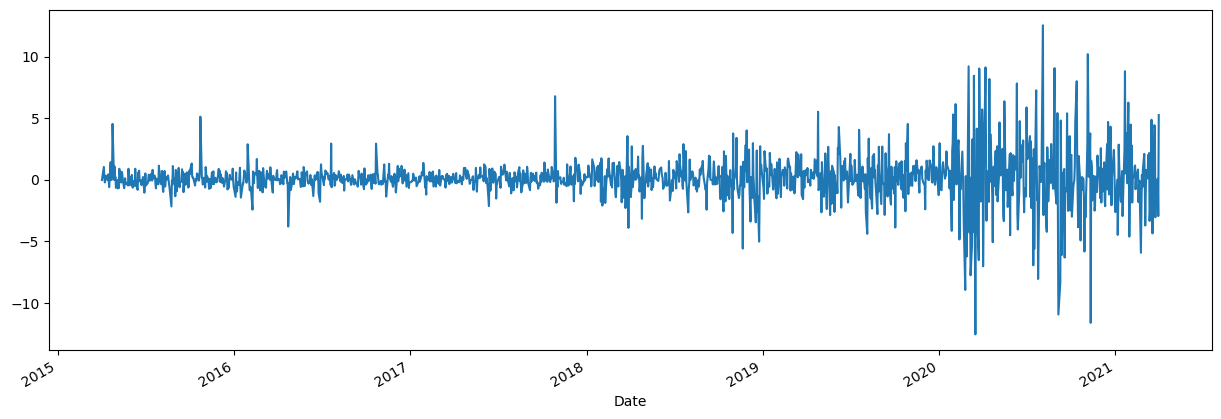

In [18]:
plt.figure(figsize=(15,5))
df['First difference'].plot()

# PACF

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

C:\Users\soori\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


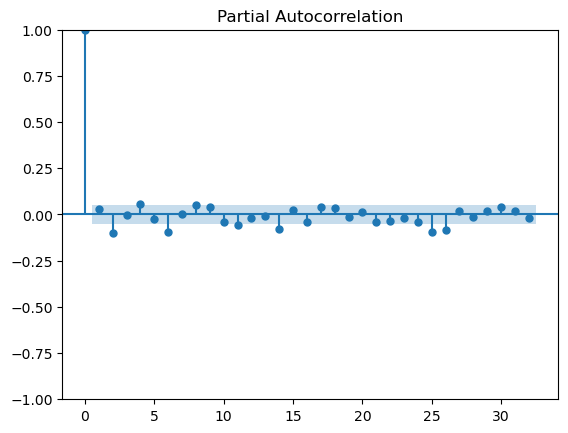

In [20]:
pacf=plot_pacf(df['First difference'].dropna())

# ACF

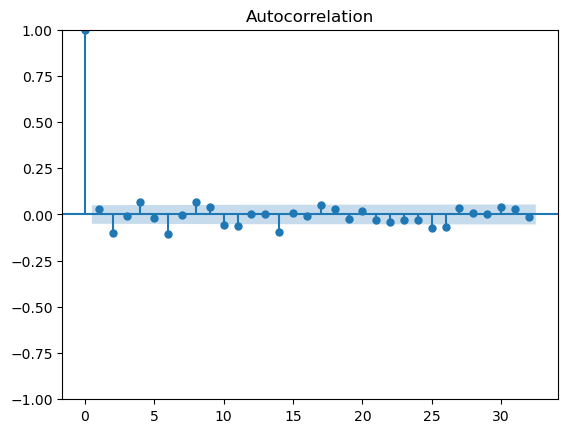

In [21]:
acf=plot_acf(df['First difference'].dropna())

#q=2,4,6,8,11,14,25,26

# ARIMA

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
#fit model
ARIMA_model=ARIMA(df['First difference'],order=(2,1,2))

C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\soori\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
ARIMA_model_fit=ARIMA_model.fit()
print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:       First difference   No. Observations:                 1511
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -3059.252
Date:                Thu, 03 Aug 2023   AIC                           6128.504
Time:                        18:14:36   BIC                           6155.103
Sample:                             0   HQIC                          6138.410
                               - 1511                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9256      0.029    -32.131      0.000      -0.982      -0.869
ar.L2          0.0083      0.014      0.615      0.539      -0.018       0.035
ma.L1         -0.0419      0.024     -1.773      0.0

In [25]:
results=ARIMA_model_fit.predict()

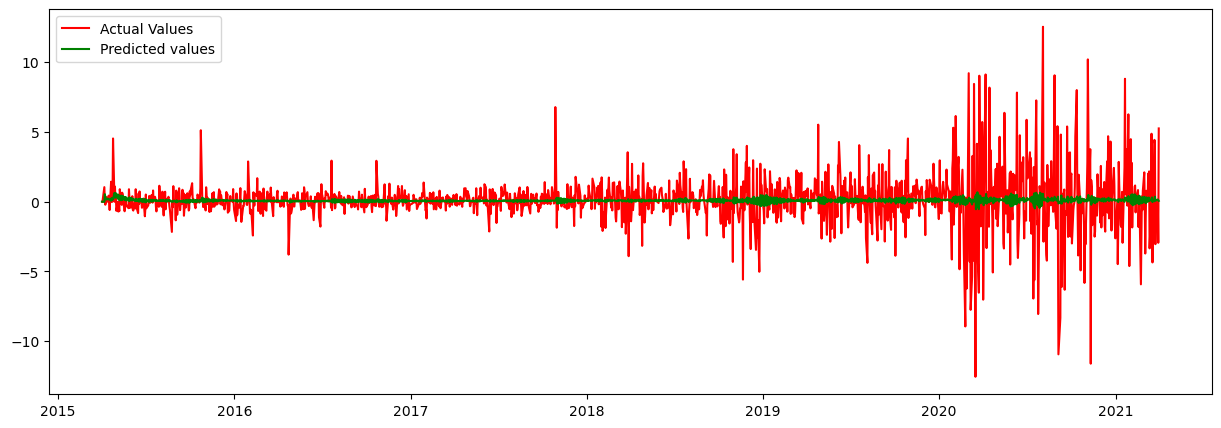

In [26]:
#plot
plt.figure(figsize=(15,5))
plt.plot(df['First difference'],color='red',label='Actual Values')
plt.plot(results,color='green',label='Predicted values')
plt.legend()
plt.show()

# Evaluation

In [27]:
import numpy as np
residuals=df['First difference']-results
rmse=np.sqrt(np.mean(residuals**2))
print(rmse)

1.8243603449536971


# taking results back to original scale

In [28]:
df['High'],df['First difference'],results

(Date
 2015-04-01 16:00:00     40.76
 2015-04-02 16:00:00     40.74
 2015-04-06 16:00:00     41.78
 2015-04-07 16:00:00     41.91
 2015-04-08 16:00:00     41.69
                         ...  
 2021-03-25 16:00:00    236.94
 2021-03-26 16:00:00    236.71
 2021-03-29 16:00:00    236.80
 2021-03-30 16:00:00    233.85
 2021-03-31 16:00:00    239.10
 Name: High, Length: 1511, dtype: float64,
 Date
 2015-04-01 16:00:00     NaN
 2015-04-02 16:00:00   -0.02
 2015-04-06 16:00:00    1.04
 2015-04-07 16:00:00    0.13
 2015-04-08 16:00:00   -0.22
                        ... 
 2021-03-25 16:00:00   -1.06
 2021-03-26 16:00:00   -0.23
 2021-03-29 16:00:00    0.09
 2021-03-30 16:00:00   -2.95
 2021-03-31 16:00:00    5.25
 Name: First difference, Length: 1511, dtype: float64,
 Date
 2015-04-01 16:00:00    0.000000
 2015-04-02 16:00:00    0.000000
 2015-04-06 16:00:00   -0.020000
 2015-04-07 16:00:00    0.534658
 2015-04-08 16:00:00    0.346733
                          ...   
 2021-03-25 16:00:00    0.

In [29]:
results.cumsum()

Date
2015-04-01 16:00:00      0.000000
2015-04-02 16:00:00      0.000000
2015-04-06 16:00:00     -0.020000
2015-04-07 16:00:00      0.514658
2015-04-08 16:00:00      0.861391
                          ...    
2021-03-25 16:00:00    126.219660
2021-03-26 16:00:00    126.312837
2021-03-29 16:00:00    126.465461
2021-03-30 16:00:00    126.578027
2021-03-31 16:00:00    126.632000
Name: predicted_mean, Length: 1511, dtype: float64

In [30]:
np.cumsum(df['First difference'])

Date
2015-04-01 16:00:00       NaN
2015-04-02 16:00:00     -0.02
2015-04-06 16:00:00      1.02
2015-04-07 16:00:00      1.15
2015-04-08 16:00:00      0.93
                        ...  
2021-03-25 16:00:00    196.18
2021-03-26 16:00:00    195.95
2021-03-29 16:00:00    196.04
2021-03-30 16:00:00    193.09
2021-03-31 16:00:00    198.34
Name: First difference, Length: 1511, dtype: float64

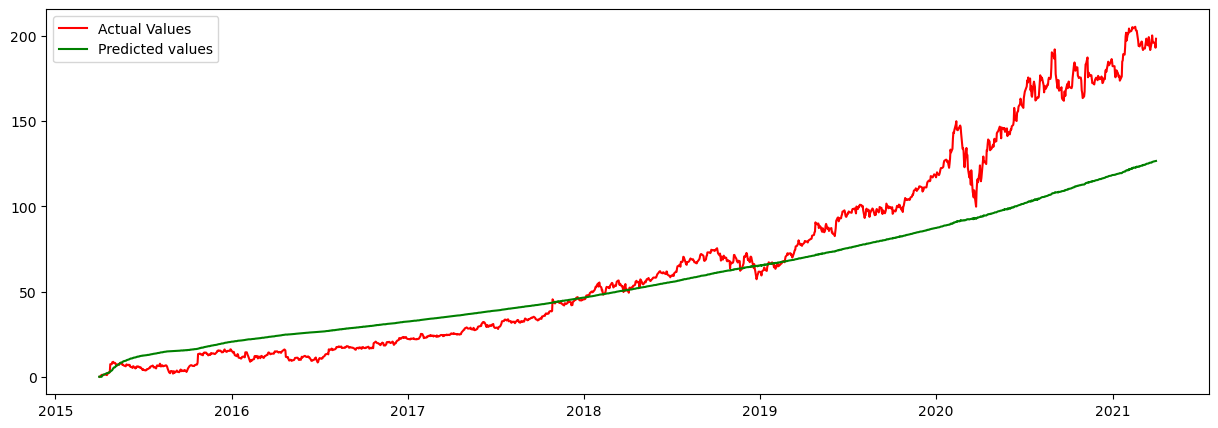

In [31]:
#plot
plt.figure(figsize=(15,5))
plt.plot(df['First difference'].cumsum(),color='red',label='Actual Values')
plt.plot(results.cumsum(),color='green',label='Predicted values')
plt.legend()
plt.show()

# AUTO ARIMA

In [33]:
!pip install pmdarima
from pmdarima import auto_arima

     -------------------------------------- 572.7/572.7 kB 6.0 MB/s eta 0:00:00


In [34]:
auto_arima(df['First difference'].dropna(),trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.63 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=6109.476, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=6110.367, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=6110.096, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6115.260, Time=0.03 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=6107.753, Time=0.51 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=6099.537, Time=0.50 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=6097.539, Time=0.21 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=6099.534, Time=0.27 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=6100.762, Time=1.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=6104.427, Time=0.12 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 4.620 seconds


ARIMA(order=(2, 0, 0), scoring_args={}, suppress_warnings=True)